Sube el archivo heart.csv


Saving heart.csv to heart.csv
Información general del dataset
Dimensiones: 1025 pacientes, 14 variables
Valores nulos totales: 0
Duplicados: 723

Tipos de datos:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Estadísticas descriptivas básicas:
           age      sex       cp  trestbps     chol      fbs  restecg  \
count  1025.00  1025.00  1025.00   1025.00  1025.00  1025.00  1025.00   
mean     54.43     0.70     0.94    131.61   246.00     0.15     0.53   
std       9.07     0.46     1.03     17.52    51.59     0.36     0.53   
min      29.00     0.00     0.00     94.00   126.00     0.00     0.00   
25%      48.00     0.00     0.00    120.00   211.00     0.00     0.00   
50%      56.00     1.00     1.00    130.00   240.00     0.00     1.00 

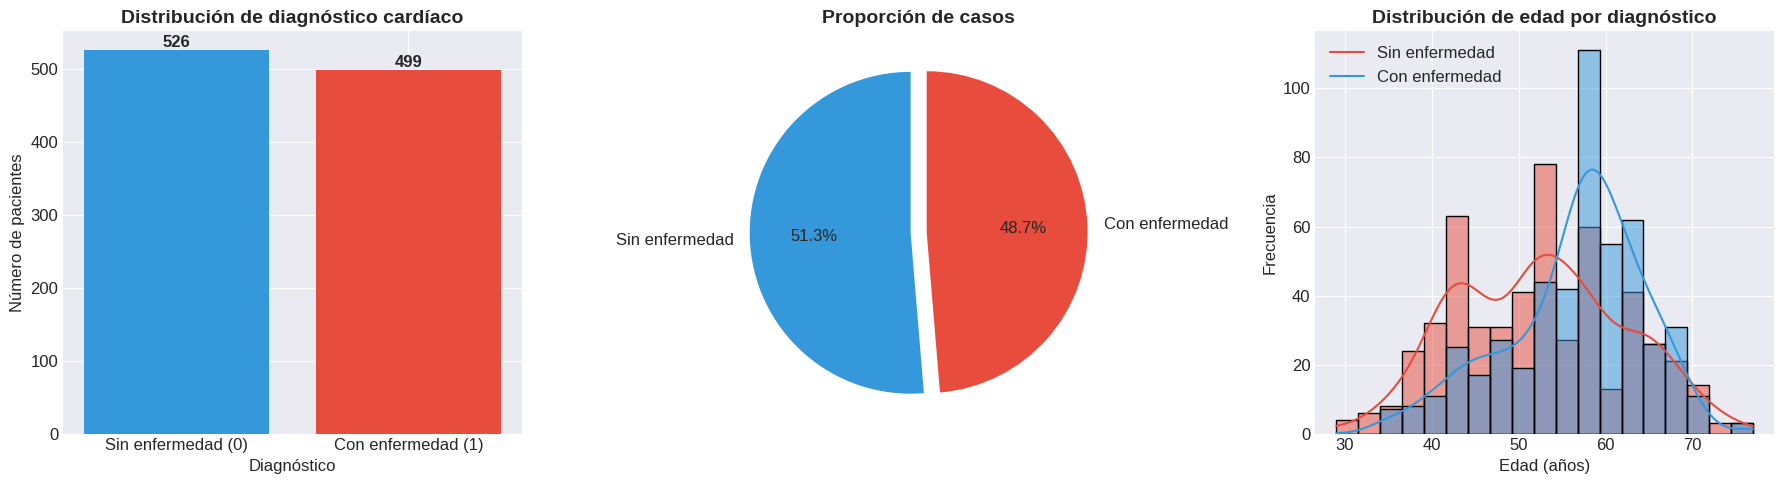


Estadísticas de distribución:
- Total de pacientes: 1025
- Pacientes con enfermedad cardíaca: 526 (51.3%)
- Pacientes sin enfermedad cardíaca: 499 (48.7%)
- Balance de clases: Balanceado
- Edad promedio pacientes sanos: 56.6 años
- Edad promedio pacientes enfermos: 52.4 años

Análisis de variables numéricas


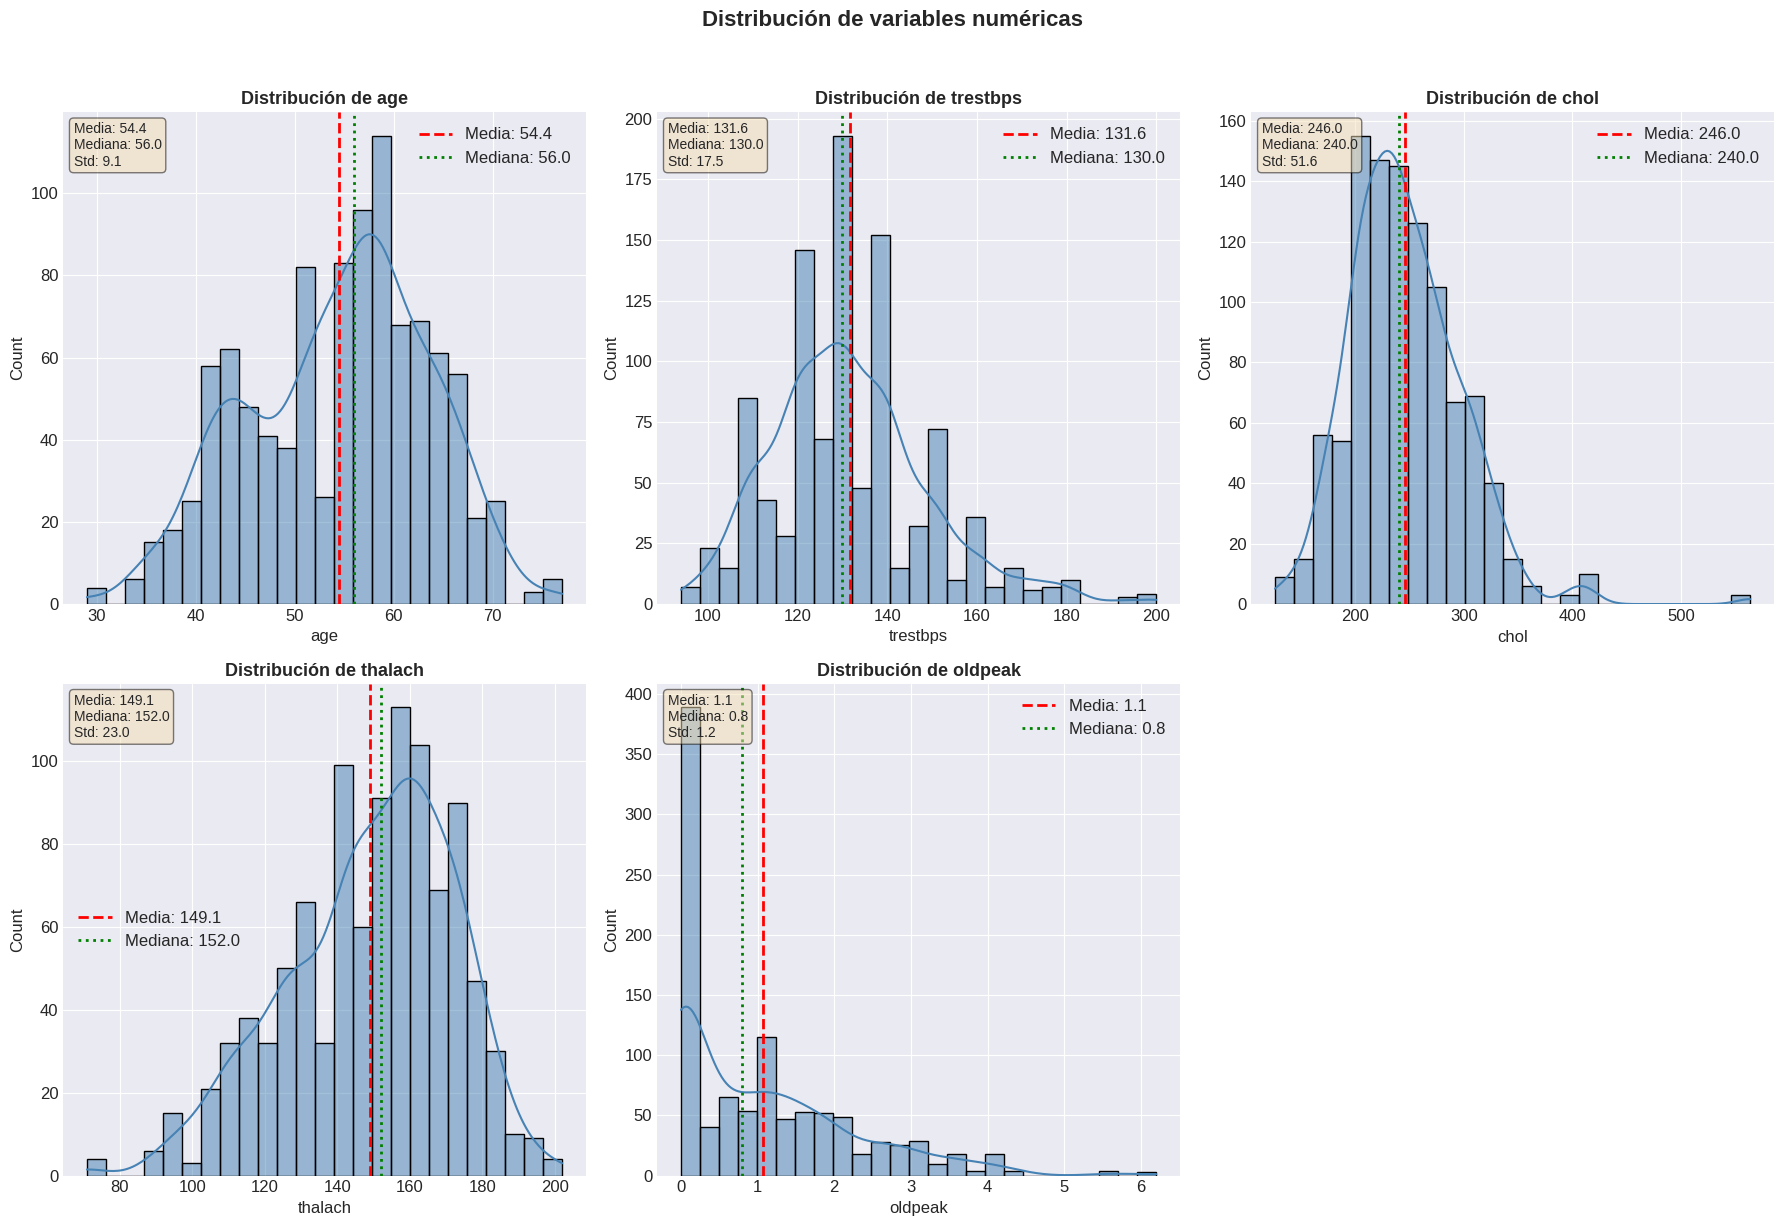


Comparación: pacientes sanos vs enfermos


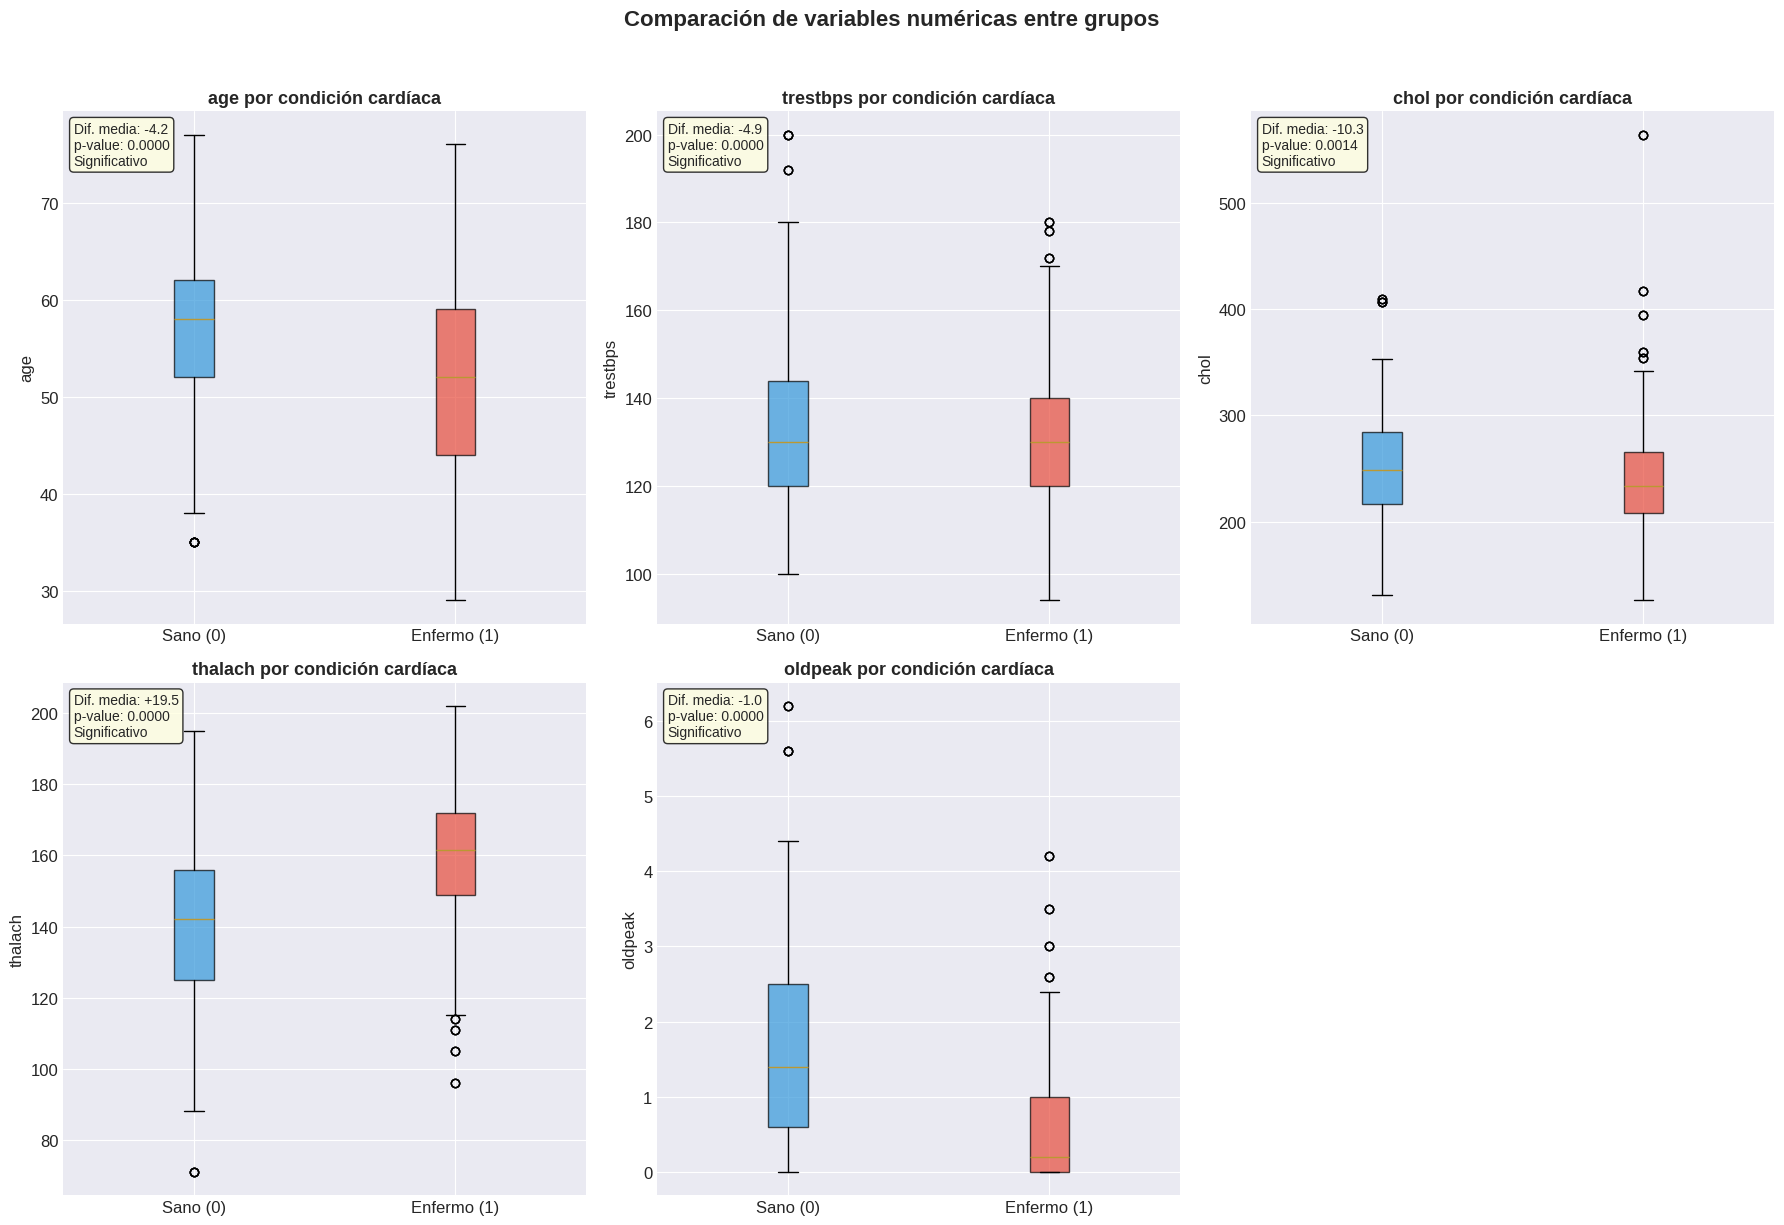


Matriz de correlación


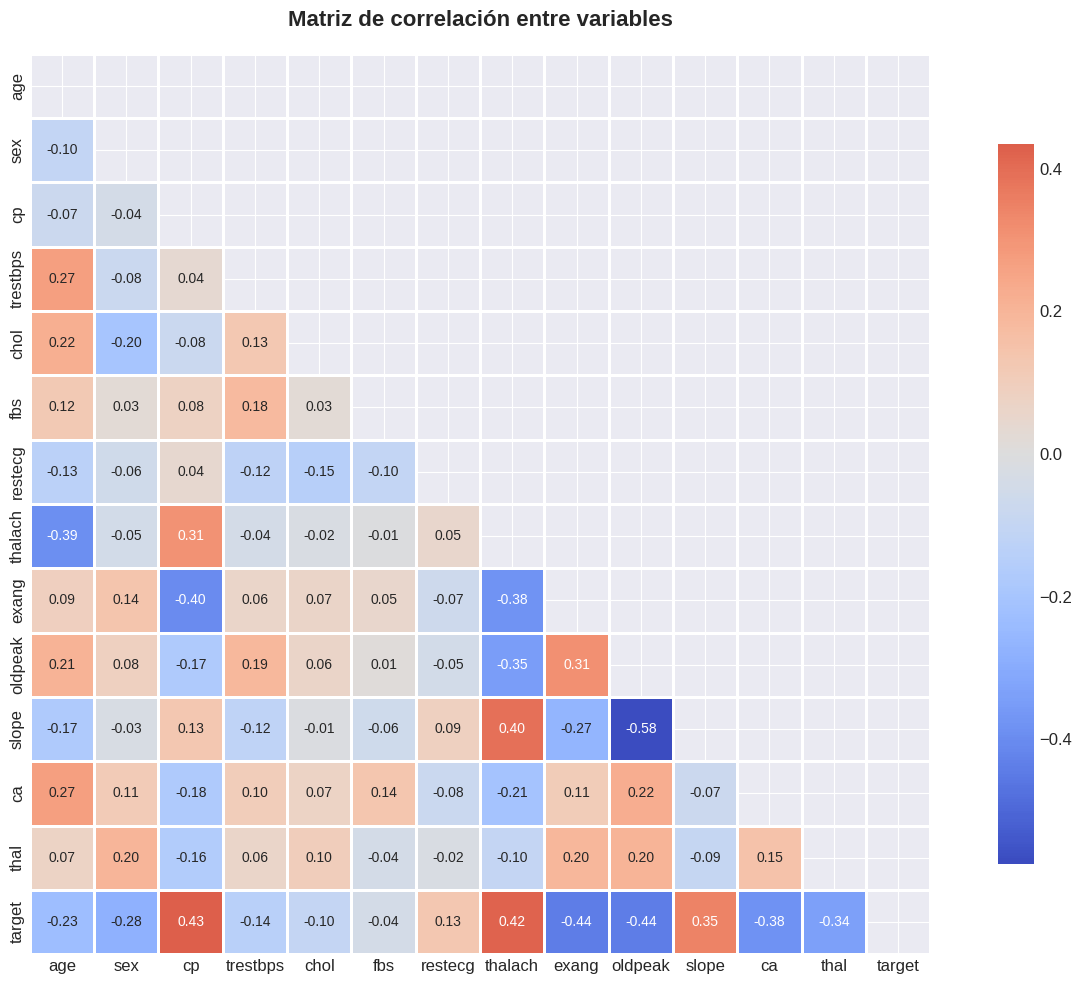


Variables más correlacionadas con enfermedad cardíaca:

Correlaciones positivas (asociadas con enfermedad):
  cp: 0.435
  thalach: 0.423
  slope: 0.346
  restecg: 0.134

Correlaciones negativas (asociadas con salud):
  fbs: -0.041
  chol: -0.100
  trestbps: -0.139
  age: -0.229
  sex: -0.280
  thal: -0.338
  ca: -0.382
  exang: -0.438
  oldpeak: -0.438

Análisis de variables categóricas


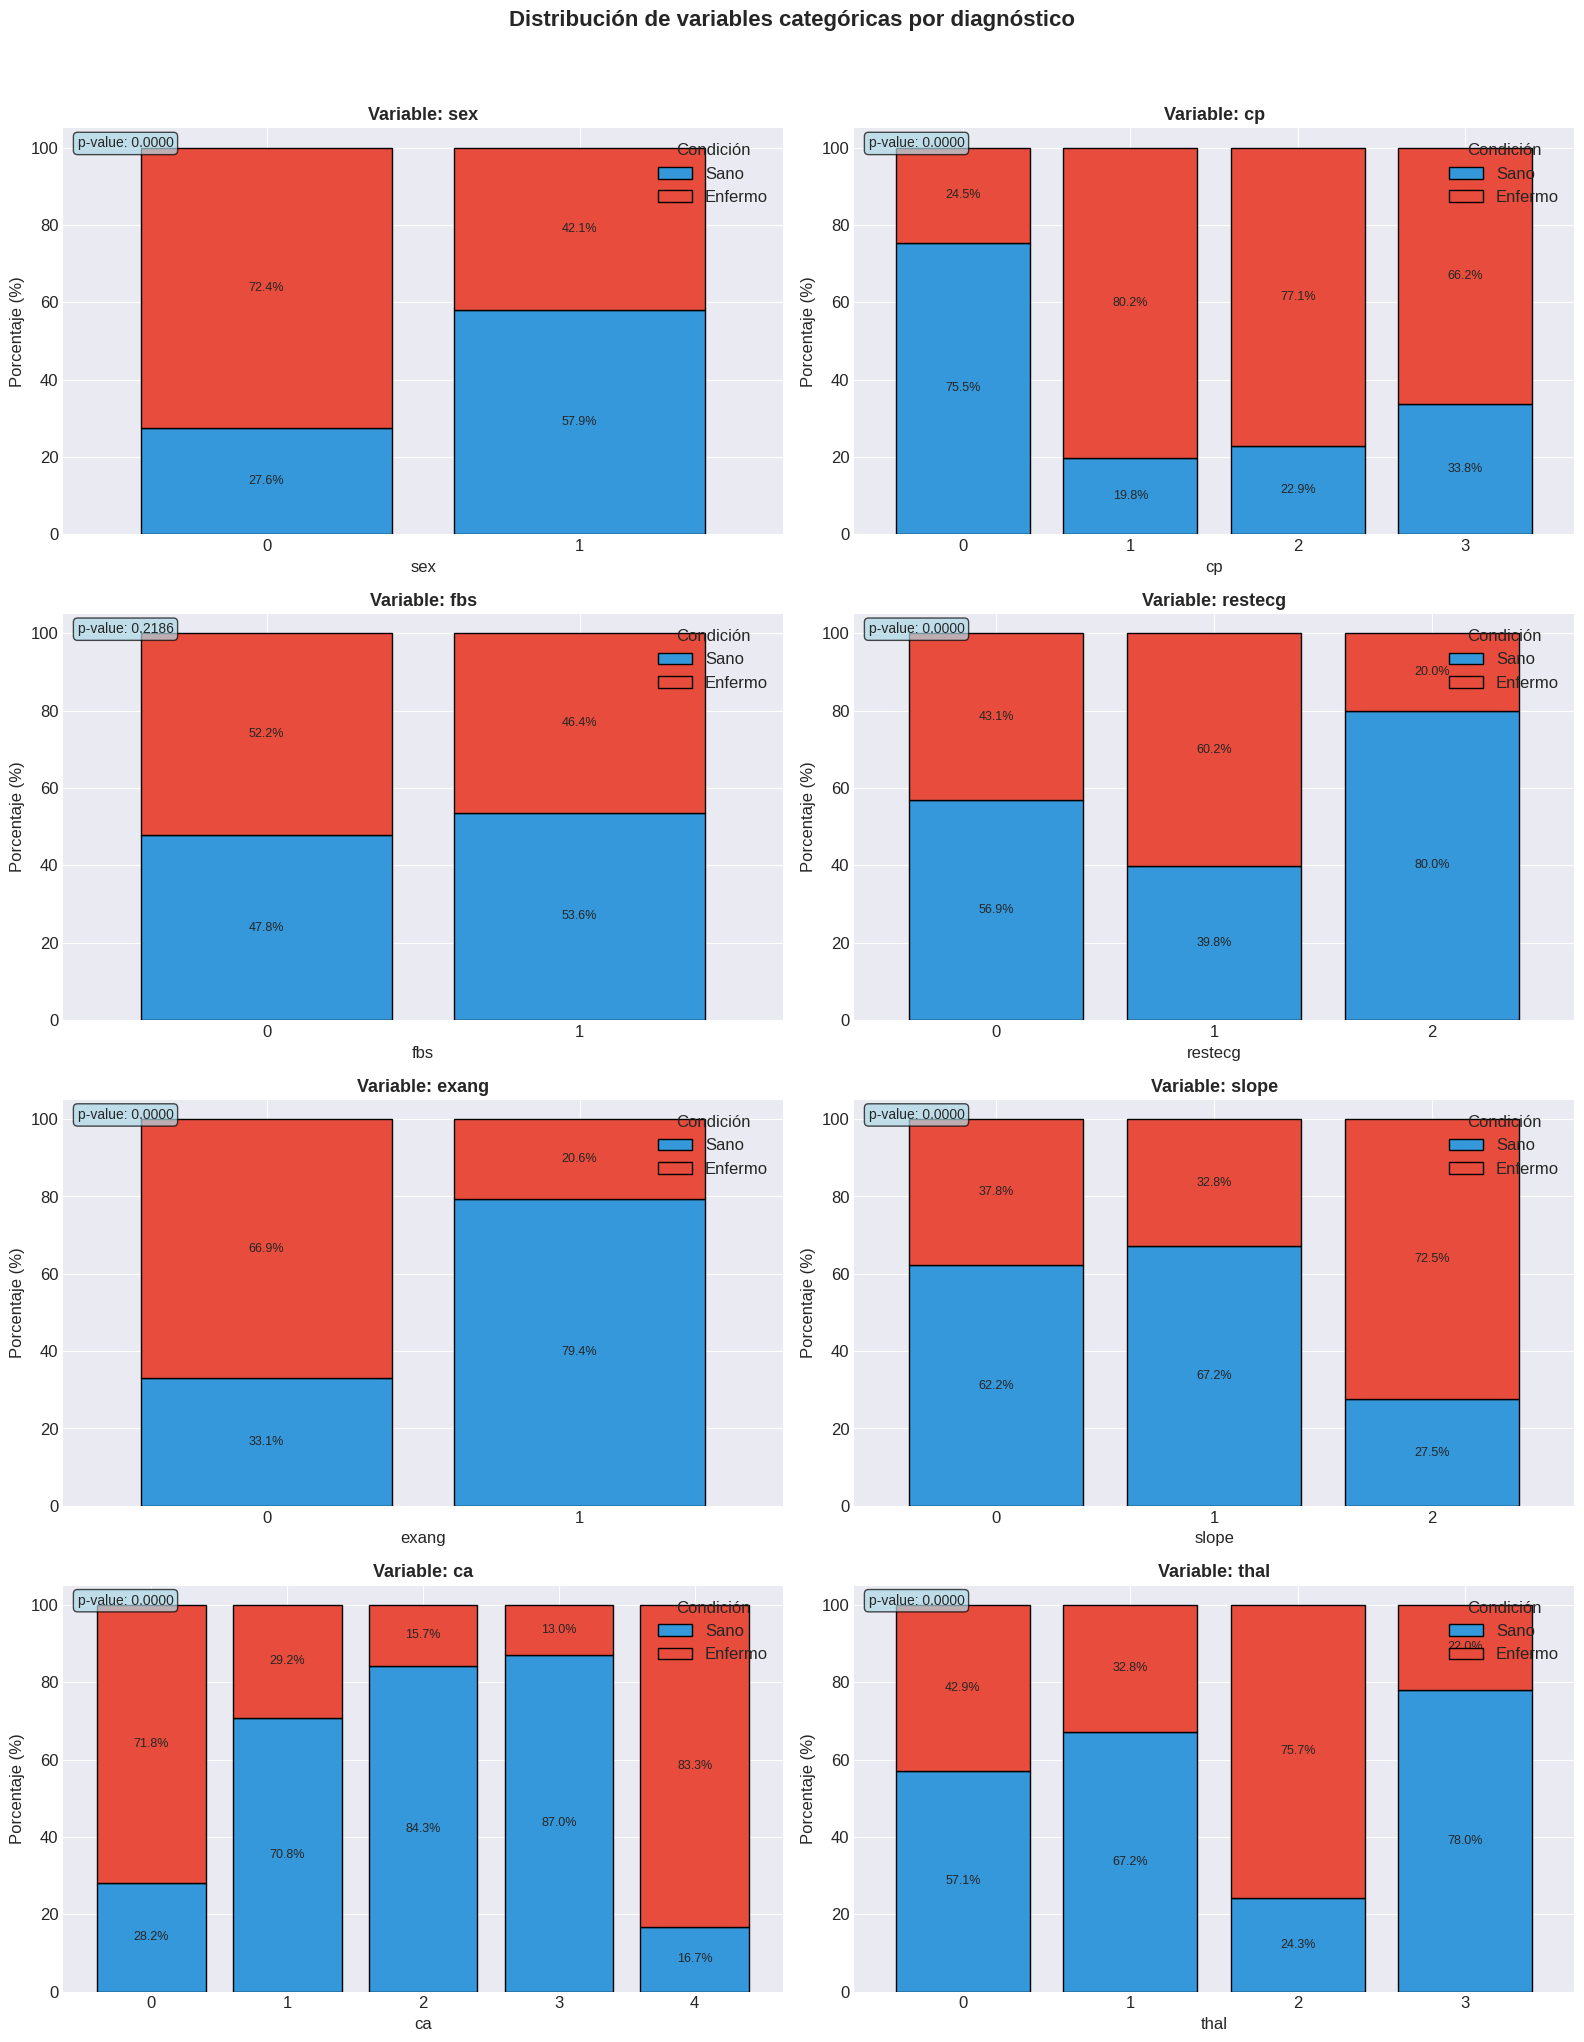


Detección de outliers


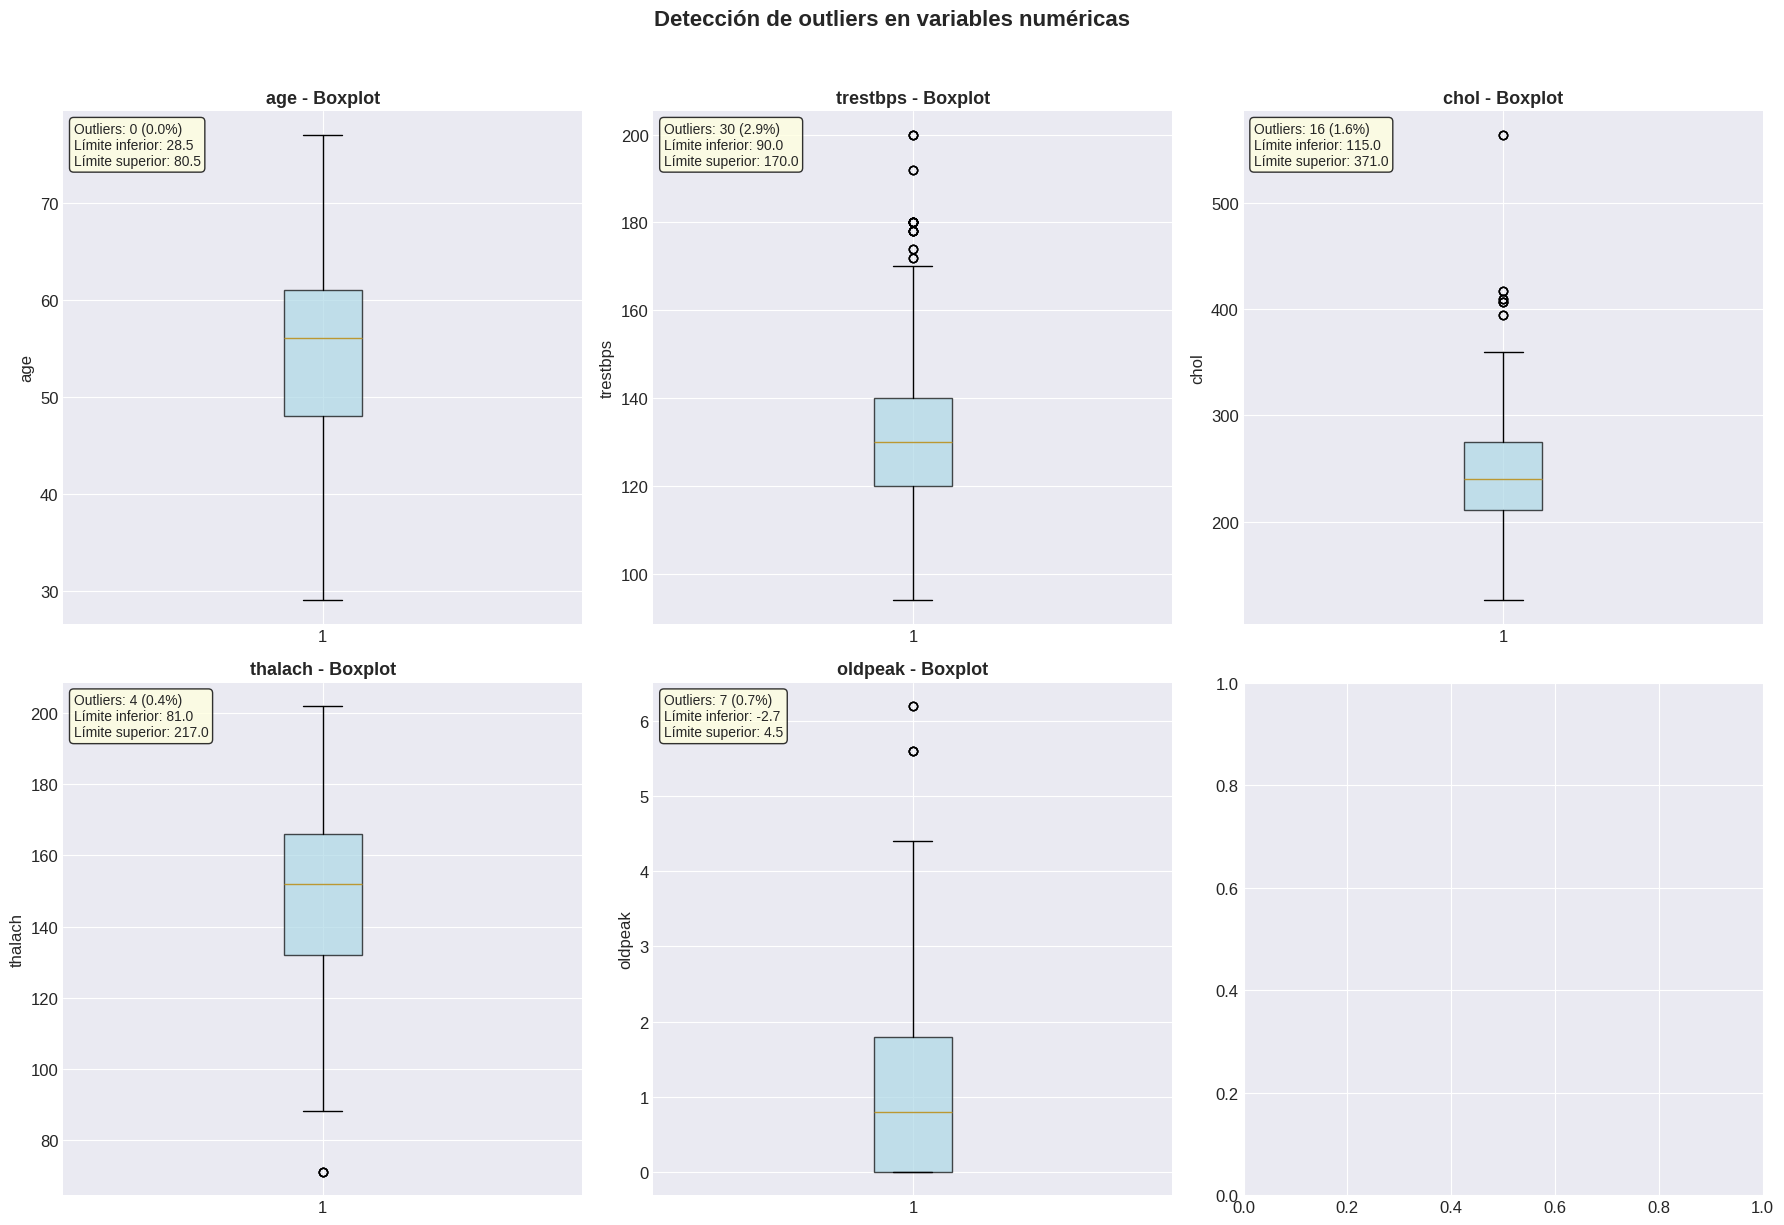


Insights principales del EDA para el reporte
Datos generales:
  - Dataset con 1025 pacientes y 14 variables clínicas.
  - No hay valores nulos en el dataset.
  - 723 registros duplicados encontrados.

Variable objetivo (target):
  - Distribución balanceada: 526 pacientes con enfermedad (51.3%) vs 499 sin enfermedad (48.7%).
  - No se requieren técnicas especiales para manejar desbalance.

Variables numéricas clave:
  - Edad promedio: 54.4 años (rango: 29-77).
  - Pacientes con enfermedad tienden a ser más jóvenes (media: 52.4 vs 56.6 años).
  - La frecuencia cardíaca máxima (thalach) muestra correlación negativa fuerte con enfermedad (-0.423).
  - La depresión ST (oldpeak) muestra correlación positiva con enfermedad (-0.438).

Hallazgos clínicamente relevantes:
  - El tipo de dolor torácico (cp) es un fuerte predictor: pacientes con tipos 2 y 3 tienen mayor prevalencia de enfermedad.
  - La angina inducida por ejercicio (exang) es más común en pacientes con enfermedad cardíaca.
  - El

In [ ]:

# Proyecto: Predicción de enfermedad cardíaca
# Facultad de Ciencias, UNAM-Temas selectos en biomatemáticas

# Instalación de librerías necesarias
!pip install pandas numpy matplotlib seaborn scikit-learn plotly -q

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Convertimos el contenido en string
data_str = """age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1,1,0,2,1"""

# Cargar el dataset completo
from google.colab import files
import io

print("Sube el archivo heart.csv")
uploaded = files.upload()

# Leer el archivo
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# Información básica del dataset
print("="*80)
print("Información general del dataset")
print("="*80)

print(f"Dimensiones: {df.shape[0]} pacientes, {df.shape[1]} variables")
print(f"Valores nulos totales: {df.isnull().sum().sum()}")
print(f"Duplicados: {df.duplicated().sum()}")

# Mostrar información detallada
print("\nTipos de datos:")
print(df.dtypes)

print("\nEstadísticas descriptivas básicas:")
print(df.describe().round(2))

# Explicación clínica de variables
print("\n" + "="*80)
print("Significado clínico de las variables")
print("="*80)

variables_info = {
    'age': 'Edad del paciente (años)',
    'sex': 'Sexo (1 = masculino, 0 = femenino)',
    'cp': 'Tipo de dolor torácico:\n  0: Angina típica\n  1: Angina atípica\n  2: Dolor no anginoso\n  3: Asintomático',
    'trestbps': 'Presión arterial en reposo (mm Hg)',
    'chol': 'Colesterol sérico (mg/dl)',
    'fbs': 'Glucosa en ayunas > 120 mg/dl (1 = sí, 0 = no)',
    'restecg': 'Electrocardiograma en reposo:\n  0: Normal\n  1: Anormalidad ST-T\n  2: Hipertrofia ventricular izquierda',
    'thalach': 'Frecuencia cardíaca máxima alcanzada',
    'exang': 'Angina inducida por ejercicio (1 = sí, 0 = no)',
    'oldpeak': 'Depresión del segmento ST inducida por ejercicio',
    'slope': 'Pendiente del segmento ST en ejercicio máximo:\n  0: Descendente\n  1: Plana\n  2: Ascendente',
    'ca': 'Número de vasos principales coloreados por fluoroscopia (0-3)',
    'thal': 'Resultado de la prueba de talio:\n  1: Normal\n  2: Defecto fijo\n  3: Defecto reversible',
    'target': 'Diagnóstico de enfermedad cardíaca (0 = no, 1 = sí)'
}

for var, info in variables_info.items():
    print(f"\n- {var}:")
    print(f"  {info}")
    if var in df.columns:
        print(f"  Valores únicos: {df[var].unique()[:10]}...")

# Análisis de la variable objetivo (target)
print("\n" + "="*80)
print("Análisis de la variable objetivo (target)")
print("="*80)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución
target_counts = df['target'].value_counts()
axes[0].bar(['Sin enfermedad (0)', 'Con enfermedad (1)'],
            target_counts.values,
            color=['#3498db', '#e74c3c'])
axes[0].set_title('Distribución de diagnóstico cardíaco', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Número de pacientes')
axes[0].set_xlabel('Diagnóstico')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=12)

# Proporción
axes[1].pie(target_counts.values,
           labels=['Sin enfermedad', 'Con enfermedad'],
           autopct='%1.1f%%',
           colors=['#3498db', '#e74c3c'],
           startangle=90,
           explode=(0.05, 0.05))
axes[1].set_title('Proporción de casos', fontsize=14, fontweight='bold')

# Distribución por edad
sns.histplot(data=df, x='age', hue='target', kde=True, ax=axes[2],
             palette={0: '#3498db', 1: '#e74c3c'})
axes[2].set_title('Distribución de edad por diagnóstico', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Edad (años)')
axes[2].set_ylabel('Frecuencia')
axes[2].legend(['Sin enfermedad', 'Con enfermedad'])

plt.tight_layout()
plt.show()

# Estadísticas de la distribución
print(f"\nEstadísticas de distribución:")
print(f"- Total de pacientes: {len(df)}")
print(f"- Pacientes con enfermedad cardíaca: {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")
print(f"- Pacientes sin enfermedad cardíaca: {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"- Balance de clases: {'Balanceado' if 40 <= target_counts[1]/len(df)*100 <= 60 else 'Desbalanceado'}")
print(f"- Edad promedio pacientes sanos: {df[df['target']==0]['age'].mean():.1f} años")
print(f"- Edad promedio pacientes enfermos: {df[df['target']==1]['age'].mean():.1f} años")

# Análisis de variables numéricas
print("\n" + "="*80)
print("Análisis de variables numéricas")
print("="*80)

numeric_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    # Histograma con KDE
    sns.histplot(data=df, x=var, kde=True, bins=25, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribución de {var}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(var)

    # Líneas de media y mediana
    mean_val = df[var].mean()
    median_val = df[var].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                    label=f'Media: {mean_val:.1f}')
    axes[i].axvline(median_val, color='green', linestyle=':', linewidth=2,
                    label=f'Mediana: {median_val:.1f}')
    axes[i].legend()

    # Estadísticas en texto
    stats_text = f"Media: {mean_val:.1f}\nMediana: {median_val:.1f}\nStd: {df[var].std():.1f}"
    axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes,
                verticalalignment='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Eliminar eje sobrante
axes[-1].set_visible(False)

plt.suptitle('Distribución de variables numéricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Comparación entre grupos (sano vs enfermo)
print("\n" + "="*80)
print("Comparación: pacientes sanos vs enfermos")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    # Crear DataFrame para el boxplot
    data_to_plot = [df[df['target']==0][var], df[df['target']==1][var]]

    # Boxplot
    bp = axes[i].boxplot(data_to_plot, patch_artist=True,
                         labels=['Sano (0)', 'Enfermo (1)'])

    # Colores
    colors = ['#3498db', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    # Configuración del gráfico
    axes[i].set_title(f'{var} por condición cardíaca', fontsize=13, fontweight='bold')
    axes[i].set_ylabel(var)

    # Calcular y mostrar diferencias estadísticas
    group_0 = df[df['target']==0][var]
    group_1 = df[df['target']==1][var]

    mean_0, mean_1 = group_0.mean(), group_1.mean()
    median_0, median_1 = group_0.median(), group_1.median()

    # Test t para diferencia de medias
    t_stat, p_value = stats.ttest_ind(group_0, group_1, nan_policy='omit')

    # Texto informativo
    info_text = f'Dif. media: {mean_1-mean_0:+.1f}\n'
    info_text += f'p-value: {p_value:.4f}\n'
    info_text += f'{"Significativo" if p_value < 0.05 else "No significativo"}'

    axes[i].text(0.02, 0.98, info_text, transform=axes[i].transAxes,
                verticalalignment='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Eliminar eje sobrante
axes[-1].set_visible(False)

plt.suptitle('Comparación de variables numéricas entre grupos',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Matriz de correlación
print("\n" + "="*80)
print("Matriz de correlación")
print("="*80)

# Calcular correlación
corr_matrix = df.corr(numeric_only=True)

# Gráfico de calor
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})
plt.title('Matriz de correlación entre variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlaciones más importantes con la variable objetivo
print("\nVariables más correlacionadas con enfermedad cardíaca:")
target_corr = corr_matrix['target'].sort_values(ascending=False)

print("\nCorrelaciones positivas (asociadas con enfermedad):")
for var, corr in target_corr.items():
    if var != 'target' and corr > 0:
        print(f"  {var}: {corr:.3f}")

print("\nCorrelaciones negativas (asociadas con salud):")
for var, corr in target_corr.items():
    if var != 'target' and corr < 0:
        print(f"  {var}: {corr:.3f}")

# Análisis de variables categóricas
print("\n" + "="*80)
print("Análisis de variables categóricas")
print("="*80)

categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Crear subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    # Crear tabla de contingencia
    cross_tab = pd.crosstab(df[var], df['target'], normalize='index') * 100

    # Gráfico de barras apiladas
    bars = cross_tab.plot(kind='bar', stacked=True, ax=axes[i],
                          color=['#3498db', '#e74c3c'],
                          edgecolor='black', width=0.8)

    axes[i].set_title(f'Variable: {var}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Porcentaje (%)')
    axes[i].legend(['Sano', 'Enfermo'], title='Condición', loc='upper right')
    axes[i].tick_params(axis='x', rotation=0)

    # Añadir porcentajes en las barras
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9)

    # Estadísticas
    chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df[var], df['target']))
    axes[i].text(0.02, 0.98, f'p-value: {p_value:.4f}', transform=axes[i].transAxes,
                verticalalignment='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.suptitle('Distribución de variables categóricas por diagnóstico',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Análisis de outliers
print("\n" + "="*80)
print("Detección de outliers")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(numeric_vars[:6]):  # Analizar solo variables principales
    # Boxplot
    bp = axes[i].boxplot(df[var].dropna(), patch_artist=True, vert=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)

    # Identificar outliers usando IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]

    axes[i].set_title(f'{var} - Boxplot', fontsize=13, fontweight='bold')
    axes[i].set_ylabel(var)

    # Información sobre outliers
    info_text = f"Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)\n"
    info_text += f"Límite inferior: {lower_bound:.1f}\n"
    info_text += f"Límite superior: {upper_bound:.1f}"

    axes[i].text(0.02, 0.98, info_text, transform=axes[i].transAxes,
                verticalalignment='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.suptitle('Detección de outliers en variables numéricas',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Insights principales para el reporte
print("\n" + "="*80)
print("Insights principales del EDA para el reporte")
print("="*80)

insights = [
    "Datos generales:",
    f"  - Dataset con {df.shape[0]} pacientes y {df.shape[1]} variables clínicas.",
    f"  - No hay valores nulos en el dataset.",
    f"  - {df.duplicated().sum()} registros duplicados encontrados.",

    "\nVariable objetivo (target):",
    f"  - Distribución balanceada: {target_counts[1]} pacientes con enfermedad ({target_counts[1]/len(df)*100:.1f}%) vs {target_counts[0]} sin enfermedad ({target_counts[0]/len(df)*100:.1f}%).",
    "  - No se requieren técnicas especiales para manejar desbalance.",

    "\nVariables numéricas clave:",
    f"  - Edad promedio: {df['age'].mean():.1f} años (rango: {df['age'].min()}-{df['age'].max()}).",
    f"  - Pacientes con enfermedad tienden a ser más jóvenes (media: {df[df['target']==1]['age'].mean():.1f} vs {df[df['target']==0]['age'].mean():.1f} años).",
    f"  - La frecuencia cardíaca máxima (thalach) muestra correlación negativa fuerte con enfermedad (-{abs(corr_matrix.loc['thalach', 'target']):.3f}).",
    f"  - La depresión ST (oldpeak) muestra correlación positiva con enfermedad ({corr_matrix.loc['oldpeak', 'target']:.3f}).",

    "\nHallazgos clínicamente relevantes:",
    "  - El tipo de dolor torácico (cp) es un fuerte predictor: pacientes con tipos 2 y 3 tienen mayor prevalencia de enfermedad.",
    "  - La angina inducida por ejercicio (exang) es más común en pacientes con enfermedad cardíaca.",
    "  - El número de vasos principales afectados (ca) aumenta con la probabilidad de enfermedad.",
    "  - Resultados de talio (thal) anormales se asocian con mayor riesgo.",

    "\nOutliers y calidad de datos:",
    "  - Variables como 'chol' (colesterol) y 'trestbps' (presión arterial) presentan algunos outliers.",
    "  - Los outliers parecen ser valores clínicamente posibles, no errores de medición.",

    "\nImplicaciones para el modelado:",
    "  - Requerirá escalado de variables numéricas (StandardScaler).",
    "  - Variables categóricas necesitan codificación (One-Hot Encoding).",
    "  - Considerar técnicas de regularización debido a posibles multicolinealidades.",
    "  - La métrica F1-score será importante dado el contexto médico.",

    "\nHipótesis para validar en modelado:",
    "  - Combinación de 'thalach' bajo y 'oldpeak' alto podría ser un predictor fuerte.",
    "  - Interacción entre 'age' y 'sex' podría mejorar el modelo.",
    "  - Variables como 'cp' y 'exang' serán importantes en modelos de árboles."
]

for insight in insights:
    print(insight)

print("\n" + "="*80)
print("EDA completado. Listo para preparación de datos y modelado")
print("="*80)

# Guardar insights en un archivo de texto
with open('insights_eda.txt', 'w') as f:
    for insight in insights:
        f.write(insight + '\n')

print("\nInsights guardados en 'insights_eda.txt'")

# Guardar gráficos para el reporte
print("\nGuardando gráficos para el reporte...")

# Guardar figura de distribución
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(['Sin enfermedad', 'Con enfermedad'], target_counts.values,
              color=['#3498db', '#e74c3c'])
ax.set_title('Distribución de enfermedad cardíaca', fontsize=14, fontweight='bold')
ax.set_ylabel('Número de pacientes')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 3,
            f'{int(height)}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('distribucion_enfermedad.png', dpi=300, bbox_inches='tight')
plt.close()

print("Gráficos guardados. Listo para el siguiente paso.")

Librerías cargadas correctamente
Dataset activo: 1025 filas, 14 columnas

Análisis de calidad de datos
Valores nulos por columna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Valores duplicados:
  723 registros duplicados (70.54%)
  Eliminando registros duplicados para evitar sesgo en el modelo...
  Nuevo tamaño del dataset: 302 registros

Preparación de datos para modelado
Variables categóricas: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Variables numéricas: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Dividiendo datos en entrenamiento (70%), validación (15%) y prueba (15%)...
  - Entrenamiento: 210 muestras (69.5%)
  - Validación: 46 muestras (15.2%)
  - Prueba: 46 muestras (15.2%)

Creando pipeline de preprocesamiento...
Pipeline de preprocesamiento configurado exitosamente

Definición y entren

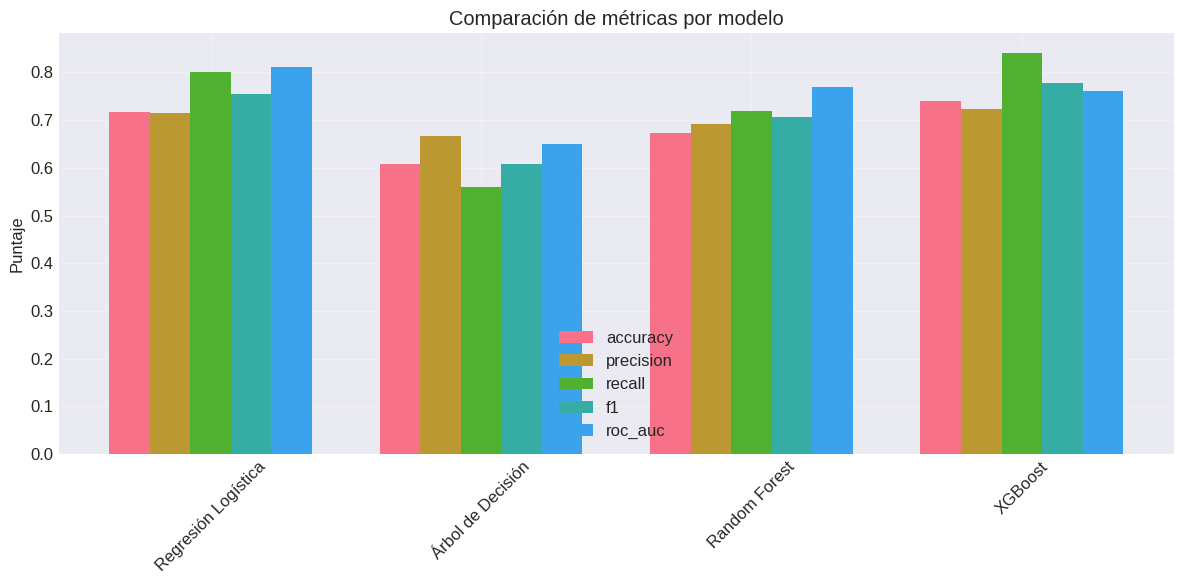

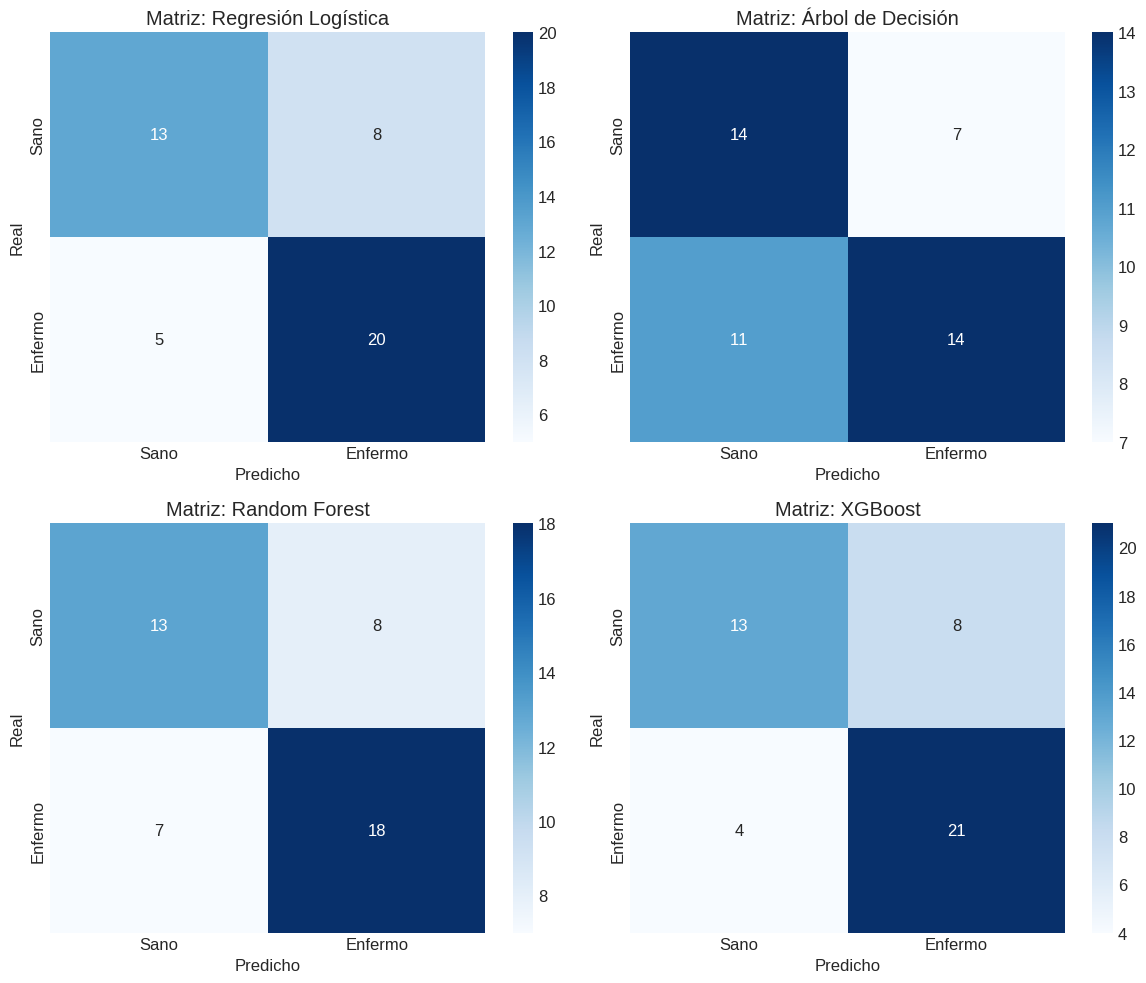


Curvas ROC comparativas


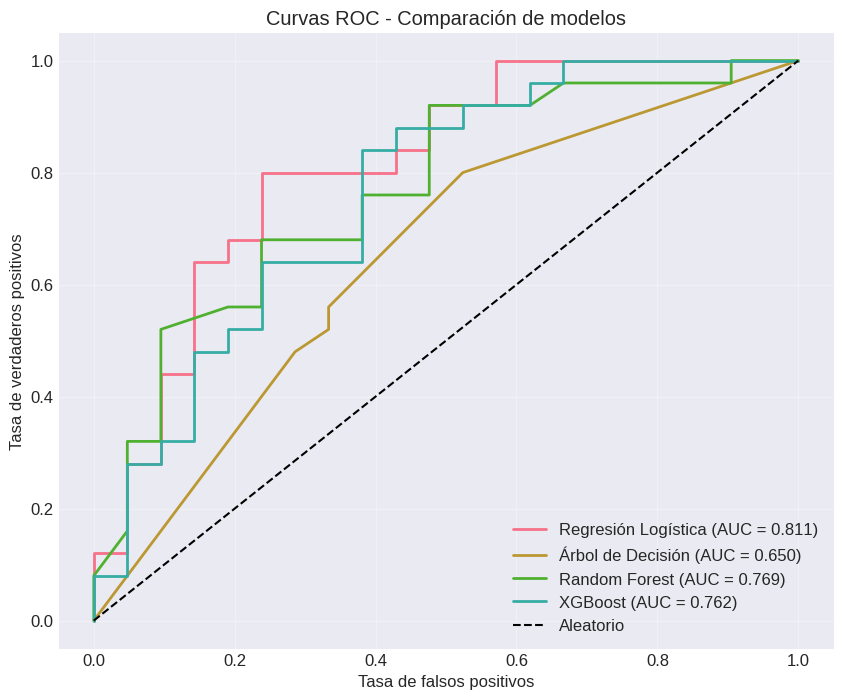


Evaluación final en conjunto de prueba
Mejor modelo seleccionado: XGBoost
  F1-score en validación: 0.7778

Métricas finales en conjunto de prueba:
  Accuracy: 0.7391
  Precision: 0.7600
  Recall: 0.7600
  F1: 0.7600
  Roc_auc: 0.8495

Análisis clínico de resultados

Matriz de confusión final:
               Predicción
               Sí    No
Real    Sí       19     6
        No        6    15

Interpretación de métricas:
- Exactitud (Accuracy): 73.91% global de aciertos.
- Precisión: 76.00% de los diagnosticados enfermos realmente lo están.
- Sensibilidad (Recall): 76.00% de los enfermos fueron detectados correctamente.
- Especificidad: 71.43% de los sanos fueron identificados correctamente.
- F1-Score: 0.7600 (balance entre precisión y sensibilidad).
- AUC-ROC: 0.8495 (capacidad de distinción entre clases).

Reporte de clasificación detallado:
              precision    recall  f1-score   support

        Sano       0.71      0.71      0.71        21
     Enfermo       0.76      0.7

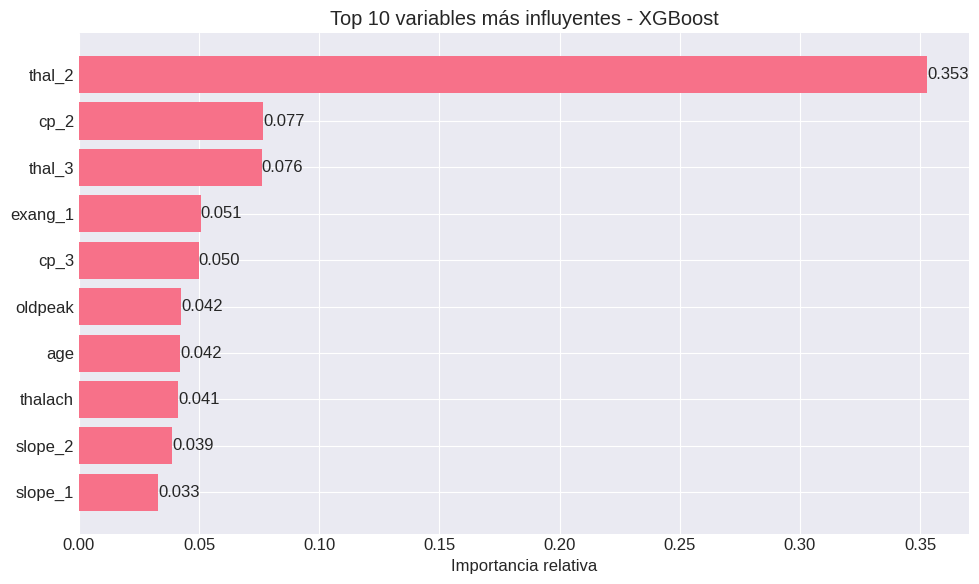


Top 5 variables más influyentes:
  thal_2: 0.3529
  cp_2: 0.0767
  thal_3: 0.0760
  exang_1: 0.0507
  cp_3: 0.0498

Análisis de errores de predicción
- Falsos positivos (Sanos diagnosticados enfermos): 6
- Falsos negativos (Enfermos no detectados): 6
- Porcentaje total de acierto: 73.9%

Guardado de resultados y modelos
Archivos generados exitosamente:
  - mejor_modelo_cardio.pkl
  - metricas_prueba.json
  - comparativa_modelos.csv


In [ ]:
# Proyecto: Predicción de enfermedad cardíaca
# Fase 2: Preparación de datos y modelado

# Importar librerías adicionales
!pip install xgboost -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Librerías para modelado
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Métricas de evaluación
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, auc)

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print("Librerías cargadas correctamente")

# Cargar datos (si es necesario recargar)
from google.colab import files
import io

# Solo ejecutar si df no está definido previamente
try:
    df.head()
except NameError:
    print("Sube el archivo heart.csv")
    uploaded = files.upload()
    df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

print(f"Dataset activo: {df.shape[0]} filas, {df.shape[1]} columnas")

# Análisis de calidad de datos y limpieza
print("\n" + "="*80)
print("Análisis de calidad de datos")
print("="*80)

print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nValores duplicados:")
duplicados = df.duplicated().sum()
print(f"  {duplicados} registros duplicados ({duplicados/len(df)*100:.2f}%)")

if duplicados > 0:
    print("  Eliminando registros duplicados para evitar sesgo en el modelo...")
    df = df.drop_duplicates()
    print(f"  Nuevo tamaño del dataset: {df.shape[0]} registros")

# Preparación de datos para modelado
print("\n" + "="*80)
print("Preparación de datos para modelado")
print("="*80)

# Definir variables
X = df.drop('target', axis=1)
y = df['target']

# Identificar tipos de variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print("Variables categóricas:", categorical_cols)
print("Variables numéricas:", numeric_cols)

# División estratificada de datos
print("\nDividiendo datos en entrenamiento (70%), validación (15%) y prueba (15%)...")
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

print(f"  - Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  - Validación: {X_val.shape[0]} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  - Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Pipeline de preprocesamiento
print("\nCreando pipeline de preprocesamiento...")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print("Pipeline de preprocesamiento configurado exitosamente")

# Definición y entrenamiento de modelos
print("\n" + "="*80)
print("Definición y entrenamiento de modelos")
print("="*80)

models = {
    'Regresión Logística': LogisticRegression(random_state=42, max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
}

# Hiperparámetros para búsqueda
param_grids = {
    'Regresión Logística': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['liblinear']
    },
    'Árbol de Decisión': {
        'classifier__max_depth': [3, 5, 7, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [5, 10, None]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.01, 0.1]
    }
}

# Entrenamiento con GridSearch
print("\nEntrenando modelos con validación cruzada (3 folds)...")

results = {}
best_models = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Modelo: {name}")
    print('='*50)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=3,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    y_val_pred = best_models[name].predict(X_val)
    y_val_prob = best_models[name].predict_proba(X_val)[:, 1]

    metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'precision': precision_score(y_val, y_val_pred),
        'recall': recall_score(y_val, y_val_pred),
        'f1': f1_score(y_val, y_val_pred),
        'roc_auc': roc_auc_score(y_val, y_val_prob),
        'best_params': grid_search.best_params_
    }

    results[name] = metrics

    print(f"  Mejores parámetros: {grid_search.best_params_}")
    print(f"  F1-score (val): {metrics['f1']:.4f}")
    print(f"  AUC-ROC (val): {metrics['roc_auc']:.4f}")

# Evaluación comparativa
print("\n" + "="*80)
print("Evaluación comparativa de resultados")
print("="*80)

results_df = pd.DataFrame(results).T.round(4)
print("\nMétricas en conjunto de validación:")
print(results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']])

# Gráfico comparativo de métricas
plt.figure(figsize=(12, 6))
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
x = np.arange(len(results_df))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width - width*2, results_df[metric], width, label=metric)

plt.xticks(x, results_df.index, rotation=45)
plt.ylabel('Puntaje')
plt.title('Comparación de métricas por modelo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Matrices de confusión
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(best_models.items()):
    y_val_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_val_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Matriz: {name}')
    axes[idx].set_xlabel('Predicho')
    axes[idx].set_ylabel('Real')
    axes[idx].set_xticklabels(['Sano', 'Enfermo'])
    axes[idx].set_yticklabels(['Sano', 'Enfermo'])

plt.tight_layout()
plt.show()

# Curvas ROC
print("\n" + "="*80)
print("Curvas ROC comparativas")
print("="*80)

plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    y_val_prob = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    auc_score = roc_auc_score(y_val, y_val_prob)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curvas ROC - Comparación de modelos')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# Evaluación final en conjunto de prueba
print("\n" + "="*80)
print("Evaluación final en conjunto de prueba")
print("="*80)

best_model_name = results_df['f1'].idxmax()
best_model = best_models[best_model_name]

print(f"Mejor modelo seleccionado: {best_model_name}")
print(f"  F1-score en validación: {results_df.loc[best_model_name, 'f1']:.4f}")

# Evaluar en prueba
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

test_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred),
    'f1': f1_score(y_test, y_test_pred),
    'roc_auc': roc_auc_score(y_test, y_test_prob)
}

print("\nMétricas finales en conjunto de prueba:")
for metric, value in test_metrics.items():
    print(f"  {metric.capitalize()}: {value:.4f}")

# Matriz de confusión detallada
cm_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm_test.ravel()

print("\n" + "="*80)
print("Análisis clínico de resultados")
print("="*80)

print("\nMatriz de confusión final:")
print(f"               Predicción")
print(f"               Sí    No")
print(f"Real    Sí     {tp:4d}  {fn:4d}")
print(f"        No     {fp:4d}  {tn:4d}")

print("\nInterpretación de métricas:")
print(f"- Exactitud (Accuracy): {test_metrics['accuracy']:.2%} global de aciertos.")
print(f"- Precisión: {test_metrics['precision']:.2%} de los diagnosticados enfermos realmente lo están.")
print(f"- Sensibilidad (Recall): {test_metrics['recall']:.2%} de los enfermos fueron detectados correctamente.")
print(f"- Especificidad: {tn/(tn+fp):.2%} de los sanos fueron identificados correctamente.")
print(f"- F1-Score: {test_metrics['f1']:.4f} (balance entre precisión y sensibilidad).")
print(f"- AUC-ROC: {test_metrics['roc_auc']:.4f} (capacidad de distinción entre clases).")

print("\nReporte de clasificación detallado:")
print(classification_report(y_test, y_test_pred, target_names=['Sano', 'Enfermo']))

# Gráfico de importancia de características
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    print("\nAnálisis de importancia de características:")

    # Obtener nombres de características
    preprocessor = best_model.named_steps['preprocessor']

    # Para numéricas
    feature_names = numeric_cols.copy()

    # Para categóricas
    categorical_transformer = preprocessor.named_transformers_['cat']
    if hasattr(categorical_transformer.named_steps['onehot'], 'get_feature_names_out'):
        cat_features = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_cols)
        feature_names.extend(cat_features)

    importances = best_model.named_steps['classifier'].feature_importances_

    importance_df = pd.DataFrame({
        'feature': feature_names[:len(importances)],
        'importance': importances
    }).sort_values('importance', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(importance_df['feature'], importance_df['importance'])
    plt.xlabel('Importancia relativa')
    plt.title(f'Top 10 variables más influyentes - {best_model_name}')
    plt.gca().invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()

    print("\nTop 5 variables más influyentes:")
    for i, row in importance_df.head().iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")

# Análisis de errores
print("\n" + "="*80)
print("Análisis de errores de predicción")
print("="*80)

test_results = pd.DataFrame({
    'real': y_test,
    'predicho': y_test_pred,
    'prob_enfermo': y_test_prob
}, index=X_test.index)

fp_cases = test_results[(test_results['real'] == 0) & (test_results['predicho'] == 1)]
fn_cases = test_results[(test_results['real'] == 1) & (test_results['predicho'] == 0)]

print(f"- Falsos positivos (Sanos diagnosticados enfermos): {len(fp_cases)}")
print(f"- Falsos negativos (Enfermos no detectados): {len(fn_cases)}")
print(f"- Porcentaje total de acierto: {(len(y_test) - len(fp_cases) - len(fn_cases))/len(y_test)*100:.1f}%")

# Guardar resultados
print("\n" + "="*80)
print("Guardado de resultados y modelos")
print("="*80)

import pickle
import json

# Guardar modelo
with open('mejor_modelo_cardio.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Guardar métricas
with open('metricas_prueba.json', 'w') as f:
    json.dump(test_metrics, f, indent=4)

# Guardar resultados comparativos
results_df.to_csv('comparativa_modelos.csv')

print("Archivos generados exitosamente:")
print("  - mejor_modelo_cardio.pkl")
print("  - metricas_prueba.json")
print("  - comparativa_modelos.csv")

In [ ]:
# Resumen para el reporte final
print("\n" + "="*80)
print("Resumen para el reporte final")
print("="*80)

resumen = f"""
Resultados del modelado predictivo:

1. Datos procesados:
   - Total pacientes: {len(df)}
   - Conjunto de entrenamiento: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)
   - Conjunto de validación: {X_val.shape[0]} ({X_val.shape[0]/len(X)*100:.1f}%)
   - Conjunto de prueba: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)

2. Mejor modelo seleccionado: {best_model_name}
   - F1-Score (prueba): {test_metrics['f1']:.4f}
   - AUC-ROC (prueba): {test_metrics['roc_auc']:.4f}
   - Accuracy (prueba): {test_metrics['accuracy']:.2%}

3. Desempeño clínico:
   - Sensibilidad (Recall): {test_metrics['recall']:.2%}
     (Capacidad para detectar pacientes realmente enfermos)
   - Especificidad: {tn/(tn+fp):.2%}
     (Capacidad para identificar correctamente a pacientes sanos)
   - Precisión: {test_metrics['precision']:.2%}
     (Confiabilidad de los diagnósticos positivos)

4. Análisis de errores:
   - Falsos positivos: {len(fp_cases)} (Riesgo de pruebas adicionales innecesarias)
   - Falsos negativos: {len(fn_cases)} (Riesgo de no tratamiento oportuno)

5. Comparativa general:
   - {results_df.index[0]}: F1={results_df.iloc[0]['f1']:.3f}, AUC={results_df.iloc[0]['roc_auc']:.3f}
   - {results_df.index[1]}: F1={results_df.iloc[1]['f1']:.3f}, AUC={results_df.iloc[1]['roc_auc']:.3f}
   - {results_df.index[2]}: F1={results_df.iloc[2]['f1']:.3f}, AUC={results_df.iloc[2]['roc_auc']:.3f}
   - {results_df.index[3]}: F1={results_df.iloc[3]['f1']:.3f}, AUC={results_df.iloc[3]['roc_auc']:.3f}

6. Conclusiones:
   - El modelo seleccionado demuestra robustez para screening inicial.
   - La métrica de sensibilidad ({test_metrics['recall']:.1f}%) sugiere utilidad clínica para evitar descartar casos positivos.
   - Se recomienda validación clínica adicional para casos en los límites
"""

print(resumen)

# Código de reproducibilidad
print("\n" + "="*80)
print("Código de reproducibilidad")
print("="*80)

print('''
 Cargar modelo entrenado
import pickle
import pandas as pd

with open('mejor_modelo_cardio.pkl', 'rb') as f:
    modelo = pickle.load(f)

 Ejemplo de nuevo paciente
nuevo_paciente = pd.DataFrame({
    'age': [55], 'sex': [1], 'cp': [2], 'trestbps': [130],
    'chol': [250], 'fbs': [0], 'restecg': [1], 'thalach': [150],
    'exang': [0], 'oldpeak': [1.2], 'slope': [2], 'ca': [0], 'thal': [2]
})

 Generar predicción
pred = modelo.predict(nuevo_paciente)[0]
prob = modelo.predict_proba(nuevo_paciente)[0][1]

print(f"Diagnóstico predicho: {'ENFERMEDAD CARDÍACA' if pred == 1 else 'SANO'}")
print(f"Probabilidad estimada: {prob:.1%}")
''')

print("\n" + "="*80)
print("Fase de modelado completada exitosamente")
print("="*80)


Resumen para el reporte final

Resultados del modelado predictivo:

1. Datos procesados:
   - Total pacientes: 302
   - Conjunto de entrenamiento: 210 (69.5%)
   - Conjunto de validación: 46 (15.2%)
   - Conjunto de prueba: 46 (15.2%)

2. Mejor modelo seleccionado: XGBoost
   - F1-Score (prueba): 0.7600
   - AUC-ROC (prueba): 0.8495
   - Accuracy (prueba): 73.91%

3. Desempeño clínico:
   - Sensibilidad (Recall): 76.00%
     (Capacidad para detectar pacientes realmente enfermos)
   - Especificidad: 71.43%
     (Capacidad para identificar correctamente a pacientes sanos)
   - Precisión: 76.00%
     (Confiabilidad de los diagnósticos positivos)

4. Análisis de errores:
   - Falsos positivos: 6 (Riesgo de pruebas adicionales innecesarias)
   - Falsos negativos: 6 (Riesgo de no tratamiento oportuno)

5. Comparativa general:
   - Regresión Logística: F1=0.755, AUC=0.811
   - Árbol de Decisión: F1=0.609, AUC=0.650
   - Random Forest: F1=0.706, AUC=0.769
   - XGBoost: F1=0.778, AUC=0.762

6.